In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(font_scale=1.5, style = 'whitegrid', context= 'notebook')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os
from matplotlib.patches import Ellipse

In [3]:
spec_ctrl = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Data_Master_Sheet_Phenorm.xlsx', sheet_name = 'Ctrl_Para')
spec_trt = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Data_Master_Sheet_Phenorm.xlsx', sheet_name = 'Trt_Para')

In [6]:
#pcc = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\AllCvAllT\\Loadings_VIP_colorcoded.xlsx', sheet_name='Orth')
pcc = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\AllCvAllT\\Para_Ldgs.csv')
pcc

,exp,PC 1 (3.71%),PC 2 (2.62%),PC 3 (2.32%),PC 4 (2.25%),PC 5 (2.23%),Q Residuals (86.86%),Hotelling T^2 (13.14%)
0,753.117,0.088017,-0.000153,0.019565,-0.070968,-0.039237,4.880588,14.279366
1,754.260,0.084517,0.008135,0.001280,-0.041654,-0.040190,3.139882,10.254903
2,755.404,0.080695,0.015357,-0.014683,-0.015626,-0.040684,2.120246,8.605403
3,756.546,0.076551,0.021514,-0.028322,0.007116,-0.040719,1.606694,8.577450
4,757.688,0.072085,0.026605,-0.039638,0.026570,-0.040294,1.418686,9.520453
...,...,...,...,...,...,...,...,...
967,1728.680,0.022037,-0.010835,-0.022616,-0.006594,-0.031515,0.848959,2.088800
968,1729.560,0.021952,-0.012661,-0.022055,-0.011713,-0.031773,0.924748,2.209375
969,1730.440,0.021324,-0.014297,-0.019914,-0.017347,-0.030117,1.019633,2.197971
970,1731.320,0.021055,-0.015608,-0.016821,-0.023631,-0.026417,1.122596,2.161574


In [10]:
pcc['exp']

0       753.117
1       754.260
2       755.404
3       756.546
4       757.688
         ...   
967    1728.680
968    1729.560
969    1730.440
970    1731.320
971    1732.200
Name: exp, Length: 972, dtype: float64

In [7]:
ctrl_mean = spec_ctrl.mean(numeric_only=True)[2:]
trt_mean = spec_trt.groupby('trt_time').mean(numeric_only=True).reset_index()
trt_mean['trt_time'] = pd.Categorical(trt_mean['trt_time'], categories= ['2mins',  '20mins',     '40mins',    '60mins',  '24h'])
trt_mean = trt_mean.sort_values('trt_time').reset_index(drop=True)
trt_mean

,trt_time,exp,spectra_num,753.117,754.26,755.404,756.546,757.688,758.831,759.973,...,1724.28,1725.16,1726.04,1726.92,1727.8,1728.68,1729.56,1730.44,1731.32,1732.2
0,2mins,2.025055e+07,4.333333,0.871751,0.893104,0.911285,0.926291,0.938124,0.946783,0.952268,...,0.439071,0.441748,0.443964,0.444860,0.443598,0.441182,0.437534,0.433925,0.430329,0.426897
1,20mins,2.025055e+07,4.766667,0.972461,0.995734,1.015007,1.030280,1.041552,1.048823,1.052094,...,0.490853,0.491852,0.492588,0.492915,0.493322,0.491888,0.489643,0.486590,0.483807,0.480253
2,40mins,2.025055e+07,4.896552,1.179586,1.180606,1.178491,1.173241,1.164856,1.153336,1.138681,...,0.550257,0.551283,0.552035,0.549602,0.546556,0.543531,0.540945,0.538153,0.535253,0.532445
3,60mins,2.025055e+07,4.966667,1.091502,1.122884,1.147767,1.166153,1.178041,1.183430,1.182322,...,0.595629,0.598258,0.598304,0.595162,0.591204,0.583046,0.581048,0.572504,0.566974,0.562037


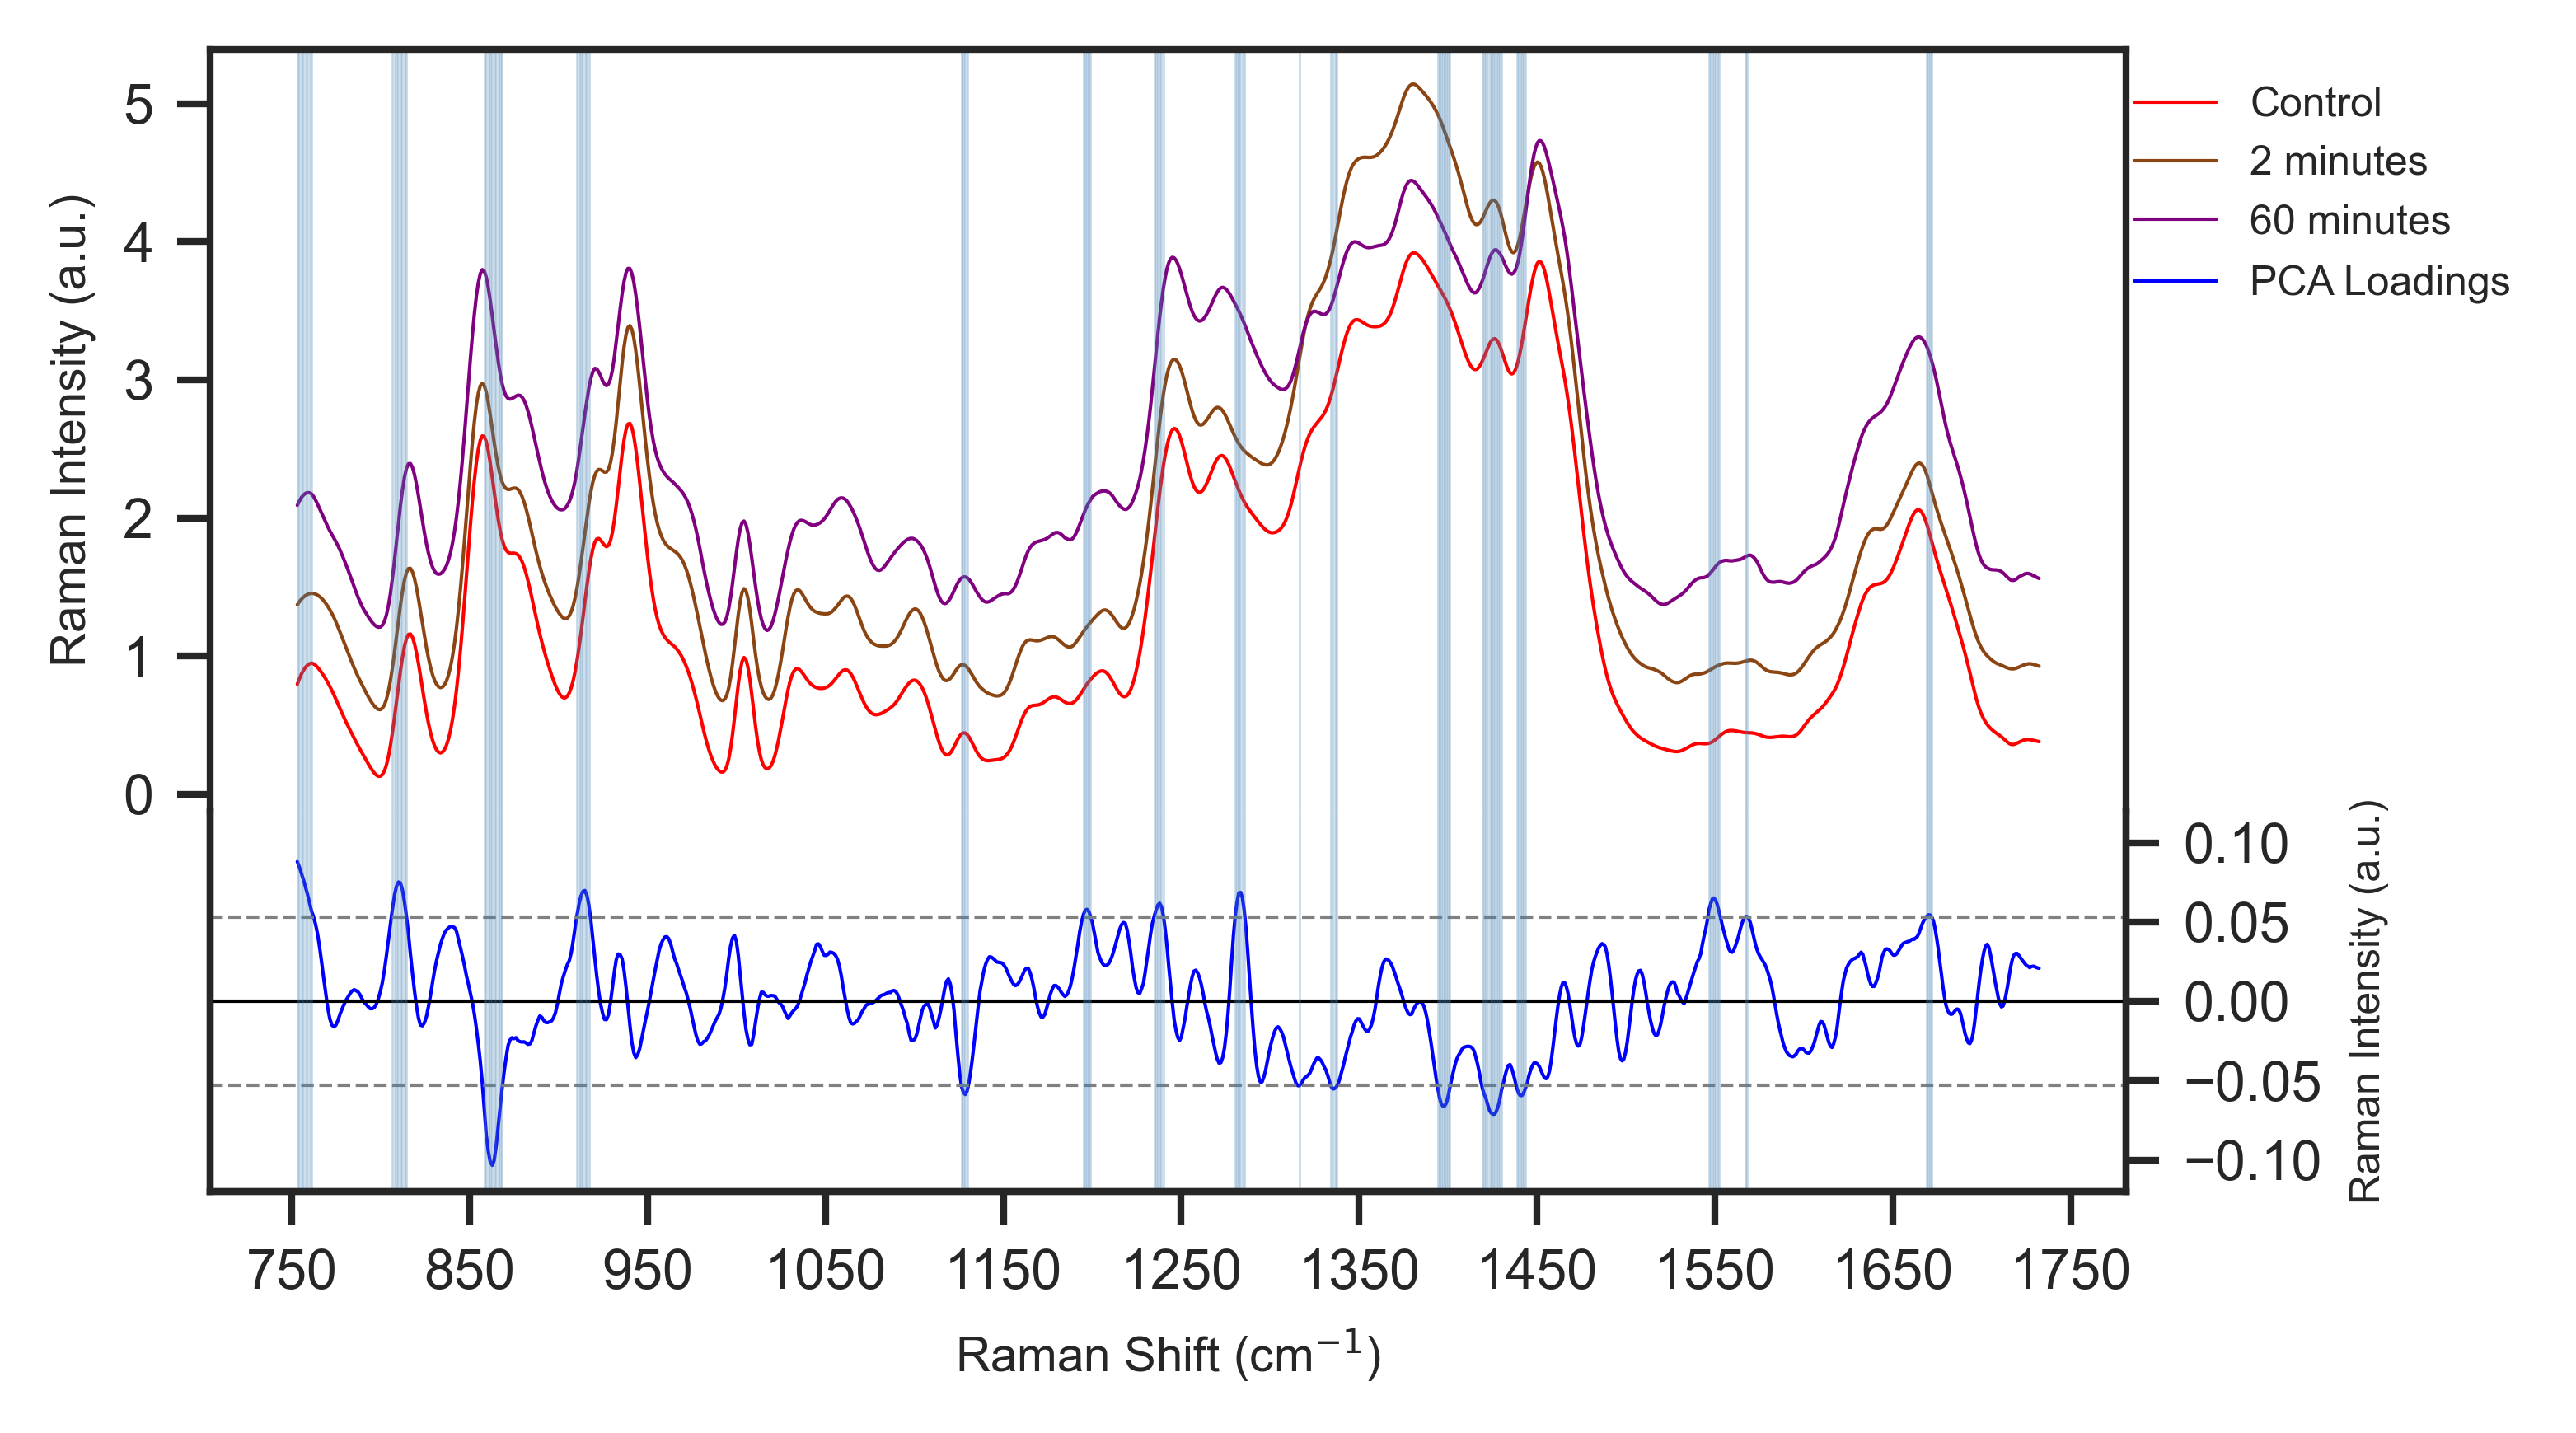

In [47]:
#All Control vs All Treated

fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(5, 3),
    sharex=True,
    gridspec_kw={"hspace": 0.00, 'height_ratios': [2, 1]},
    dpi = 600
    )
ax1, ax2= axes
sns.lineplot(
    x = ctrl_mean.index.astype(float),
    y = ctrl_mean.values,
    color = 'red',
                lw = .5,
                ax = ax1,
                label = 'Control'

)
sns.lineplot(
    x = ctrl_mean.index.astype(float),
    y = trt_mean.iloc[0, 3:].values +.5,
    color = 'saddlebrown',
                lw = .5,
                ax = ax1,
                label = '2 minutes'

)
sns.lineplot(
    x = ctrl_mean.index.astype(float),
    y = trt_mean.iloc[3, 3:].values +1,
    color = 'purple',
                lw = .5,
                ax = ax1,
                label = '60 minutes'

)
ax2_r = ax2.twinx()
sns.lineplot(
        x = pcc['exp'].values,
        y = pcc.iloc[:, 1].values,
                #x = pcc.columns[1:].astype(float),
                #y = pcc.iloc[b, 1:], # +b/7,
                #label = pcc['exp'][b],
                color = 'blue',
                lw = .5,
                ax = ax2_r,
                label = 'PCA Loadings'
                #hue = 'trt_time'
            #palette=col_map
            )
ax2.yaxis.set_visible(False)
ax2_r. set_ylim(-.12, .12)
ax2_r.set_ylabel('Raman Intensity (a.u.)', fontsize = 6)
ax2_r.axhline(0, lw = .5, color = 'black')
ax2_r.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlabel("Raman Shift (cm$^{-1}$)", fontdict = {'size': 7})
ax2.set_xticks(np.arange(750, 1760, 100))   # just positions
ax2.tick_params(axis="x", labelsize=8)
ax1.set_yticks(np.arange(0, 5.2, 1))   # just positions
ax1.tick_params(axis="y", labelsize=8)
ax2_r.set_yticks(np.arange(-.1, .11, .05))   # just positions
ax2_r.tick_params(axis="y", labelsize=8)

ax1.set_ylabel('Raman Intensity (a.u.)', fontsize = 7)
ax1.spines['bottom'].set_visible(False)

ax1.legend(frameon = False, fontsize = 6, bbox_to_anchor  =(.985, 1))
ax2_r.legend(frameon = False, bbox_to_anchor  =(1.22, 2.53), fontsize = 6) #1.245, 1.017

#Find loadings with values over 95th percentile as important loadings
p95 = pcc.iloc[:, 1].abs().quantile(.90)
mask = pcc.iloc[:, 1].abs()>(p95)
col_idx = mask.to_numpy().nonzero()

    # Optional: get column names and row labels
cols = pcc.iloc[:, 0].values[col_idx]

plt.axhline(p95, color = 'grey', ls = '--', lw = .5)
plt.axhline(-p95, color = 'grey', ls = '--', lw = .5)

for p in cols:
    ax1.axvline(x=p, color='steelblue', linestyle='-', linewidth=0.3, alpha = .35)
    ax2_r.axvline(x=p, color='steelblue', linestyle='-', linewidth=0.3, alpha = .35)

In [37]:
pcc.iloc[:, 0].values[col_idx]

array([ 753.117,  754.26 ,  755.404,  756.546,  757.688,  758.831,
        759.973,  761.114,  806.544,  807.674,  808.803,  809.933,
        811.062,  812.19 ,  813.318,  814.447,  858.217,  859.334,
        860.45 ,  861.566,  862.682,  863.798,  864.913,  866.028,
        867.142,  868.257,  910.389,  911.492,  912.595,  913.698,
        914.8  ,  915.902,  917.003, 1126.45 , 1127.49 , 1128.54 ,
       1129.58 , 1194.92 , 1195.95 , 1196.98 , 1198.01 , 1199.04 ,
       1234.83 , 1235.84 , 1236.86 , 1237.88 , 1238.89 , 1239.91 ,
       1280.35 , 1281.35 , 1282.36 , 1283.36 , 1284.37 , 1285.37 ,
       1316.37 , 1334.24 , 1335.23 , 1336.22 , 1337.21 , 1394.18 ,
       1395.15 , 1396.12 , 1397.1  , 1398.07 , 1399.04 , 1400.02 ,
       1400.99 , 1419.42 , 1420.38 , 1421.35 , 1422.32 , 1423.29 ,
       1424.25 , 1425.22 , 1426.18 , 1427.15 , 1428.11 , 1429.08 ,
       1430.04 , 1438.71 , 1439.67 , 1440.63 , 1441.6  , 1442.56 ,
       1443.52 , 1546.65 , 1547.58 , 1548.51 , 1549.45 , 1550.

KeyError: 'key of type tuple not found and not a MultiIndex'

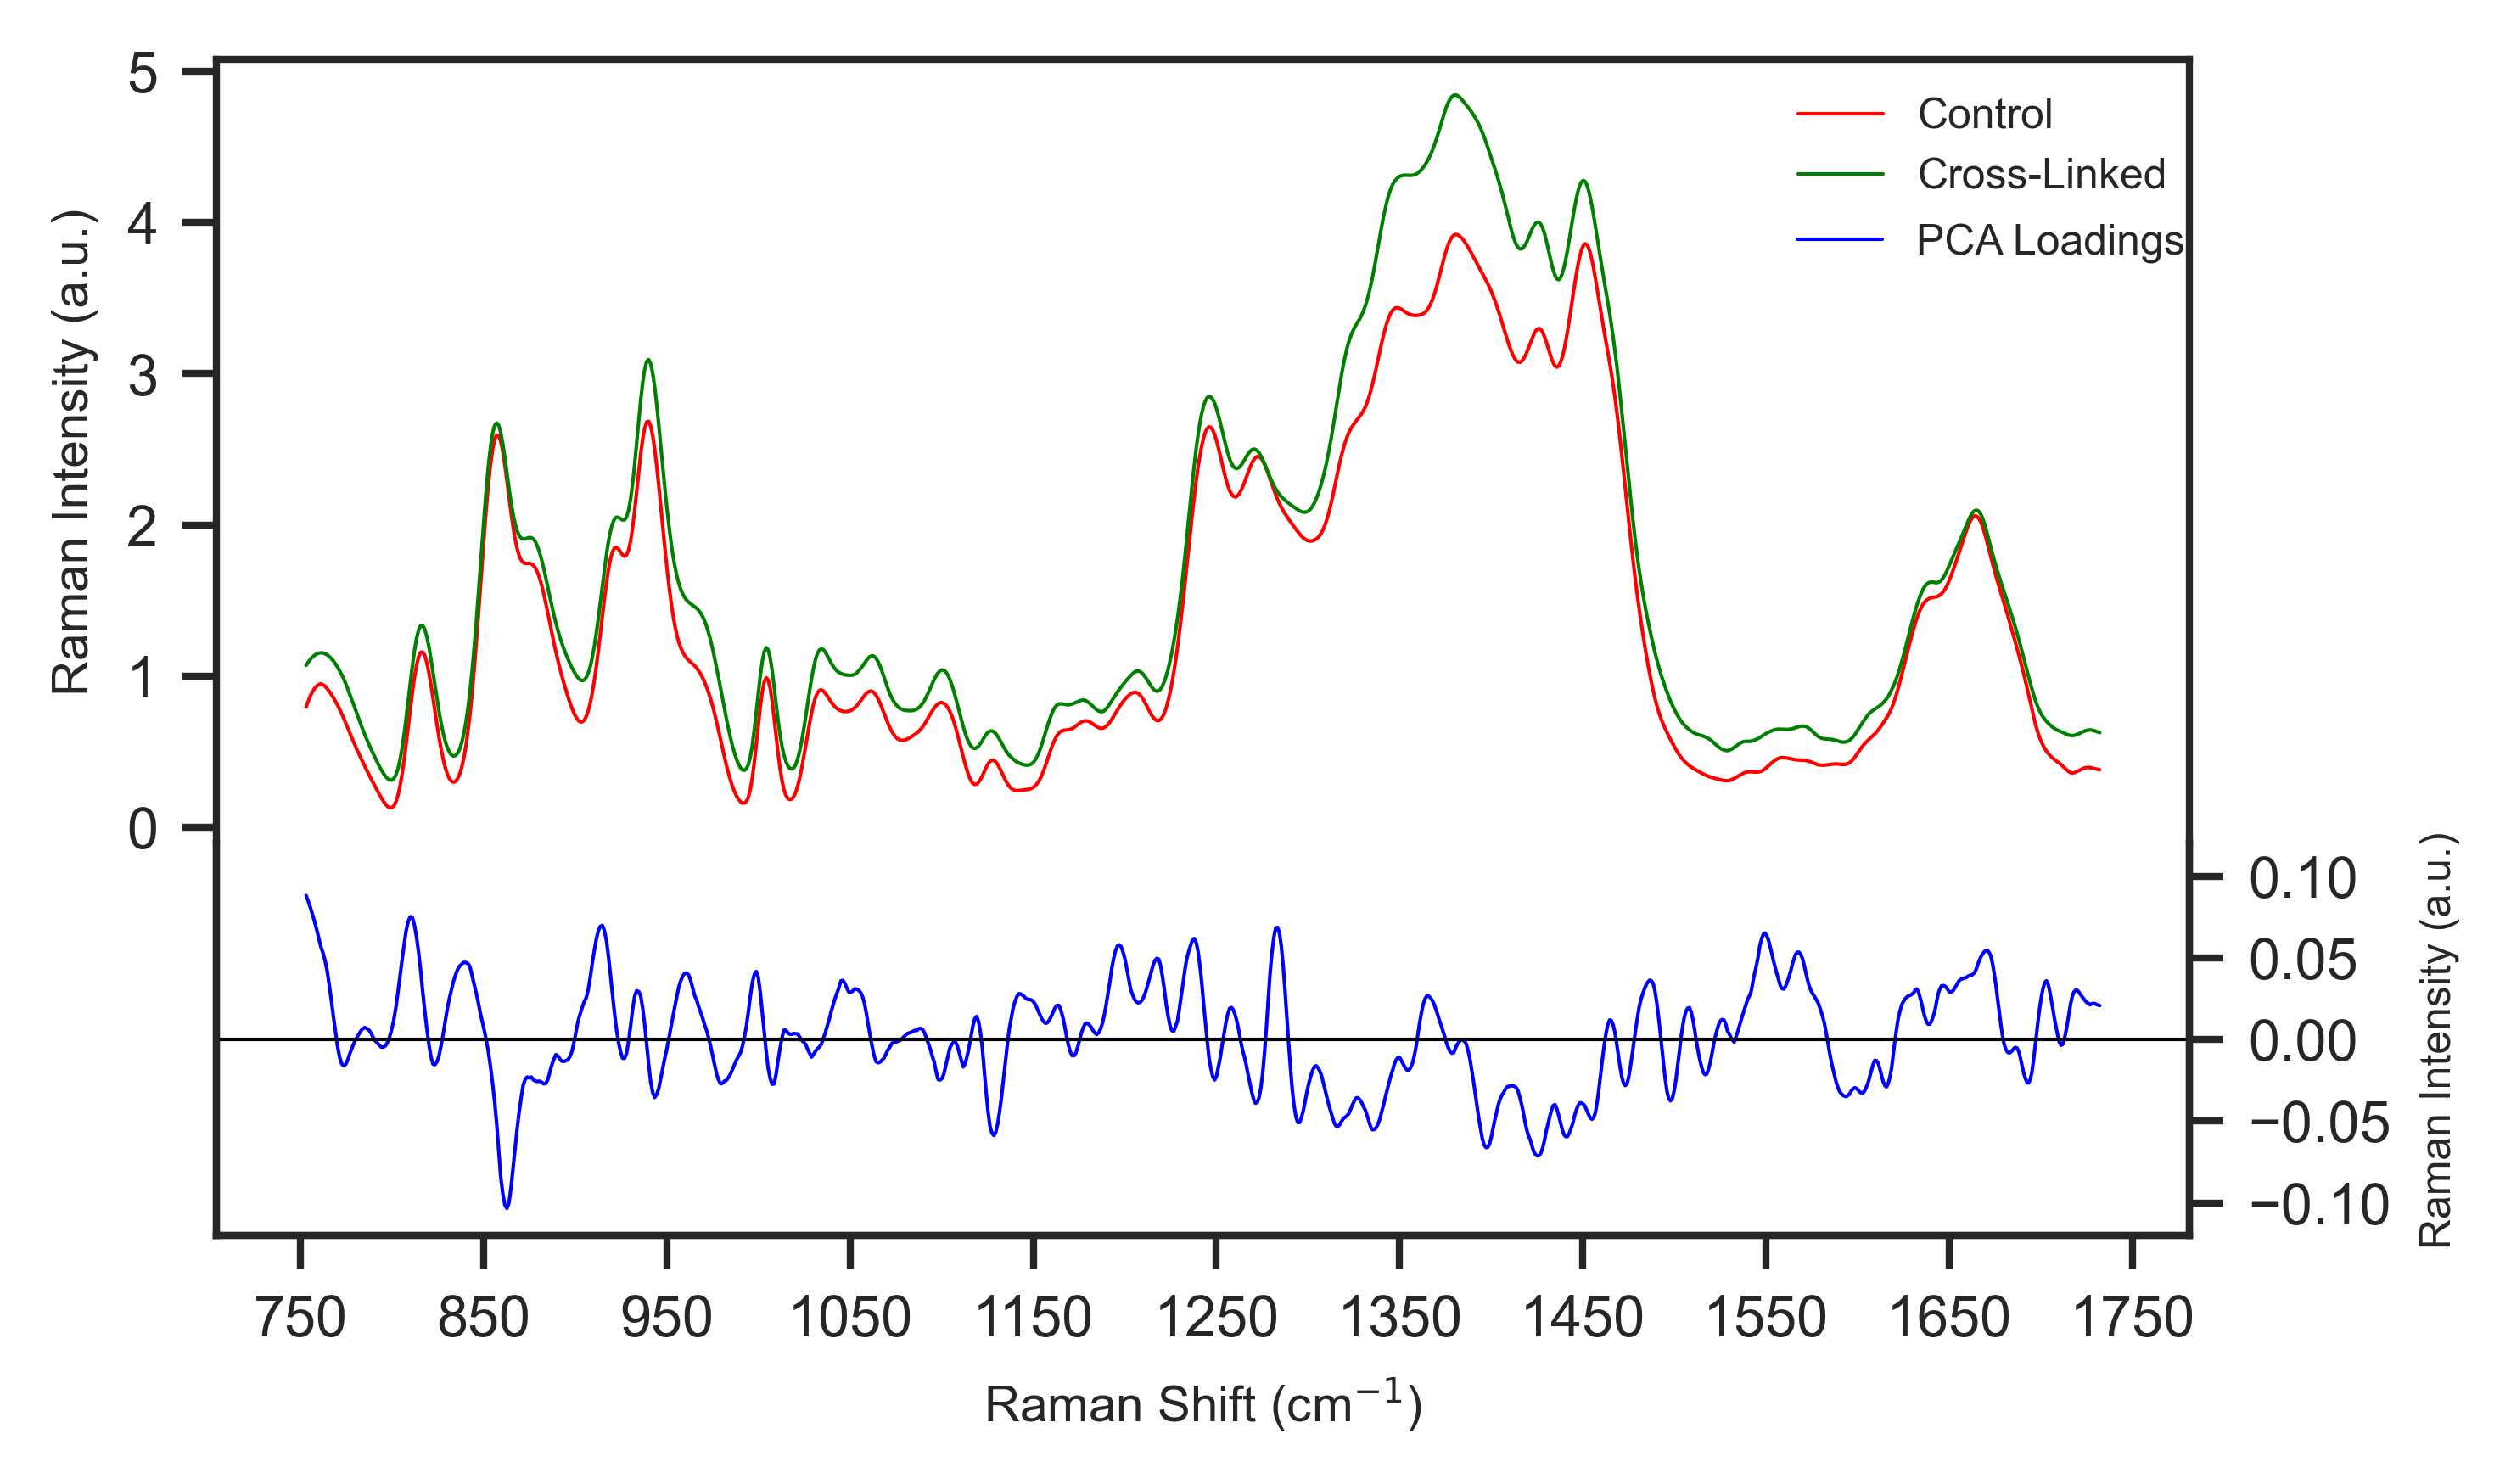

In [ ]:

sns.set_theme(style = 'ticks', context = 'paper', font_scale=1.5)
for b in range(4):
    fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(5, 3),
    sharex=True,
    gridspec_kw={"hspace": 0.00, 'height_ratios': [2, 1]},
    dpi = 600
    )

    ax1, ax2= axes
    sns.lineplot(
                x = ctrl_mean.index.astype(float),
                y = ctrl_mean.values, # +b/7,
                #label = trt_mean['trt_time'][b],
                color = 'red',
                lw = .5,
                ax = ax1,
                label = 'Control'
                #f'Mean Spectra: {trt_mean['trt_time'][b]}'
                #hue = 'trt_time'
            #palette=col_map
    )
    sns.lineplot(
                x = trt_mean.columns[3:].astype(float),
                y = trt_mean.iloc[b, 3:]+.2,
                #label = trt_mean['trt_time'][b],
                color = 'green',
                lw = .5,
                ax = ax1,
                label = 'Cross-Linked'
                #f'Mean Spectra: {trt_mean['trt_time'][b]}'
                #hue = 'trt_time'
            #palette=col_map
            )
    ax2_r = ax2.twinx()
    sns.lineplot(
        x = pcc['exp'].values,
        y = pcc.iloc[:, 1].values,
                #x = pcc.columns[1:].astype(float),
                #y = pcc.iloc[b, 1:], # +b/7,
                #label = pcc['exp'][b],
                color = 'blue',
                lw = .5,
                ax = ax2_r,
                label = 'PCA Loadings'
                #hue = 'trt_time'
            #palette=col_map
            )
    #plt.legend(bbox_to_anchor = (1, 1), frameon = False)
    #plt.xlabel("Raman Shift (cm$^{-1}$)")
    #plt.ylabel("Normalized Intensity (a.u.)")
    #plt.ylim(-.05, .75)
    #plt.xticks(np.arange(750, 1760, 100), fontsize = 6)

    ax2.yaxis.set_visible(False)
    ax2_r. set_ylim(-.12, .12)
    ax2_r.set_ylabel('Raman Intensity (a.u.)', fontsize = 6)
    ax2_r.axhline(0, lw = .5, color = 'black')
    ax2_r.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.set_xlabel("Raman Shift (cm$^{-1}$)", fontdict = {'size': 7})
    ax2.set_xticks(np.arange(750, 1760, 100))   # just positions
    ax2.tick_params(axis="x", labelsize=8)
    ax1.set_yticks(np.arange(0, 5.2, 1))   # just positions
    ax1.tick_params(axis="y", labelsize=8)
    ax2_r.set_yticks(np.arange(-.1, .11, .05))   # just positions
    ax2_r.tick_params(axis="y", labelsize=8)

    ax1.set_ylabel('Raman Intensity (a.u.)', fontsize = 7)
    #ax1.set_ylim(-.01, .25)
    ax1.spines['bottom'].set_visible(False)

    ax1.legend(frameon = False, fontsize = 6, bbox_to_anchor  =(1.008, 1))
    ax2_r.legend(frameon = False, bbox_to_anchor  =(1.017, 2.68), fontsize = 6) #1.245

#Find loadings with values over 95th percentile as important loadings
    p95 = pcc.iloc[:, 1].abs().quantile(.90)
    mask = pcc.iloc[:, 1].abs()>(p95)
    col_idx = mask.to_numpy().nonzero()

# Optional: get column names and row labels
    cols = pcc.iloc[:, 0][col_idx]
    for p in cols:
        ax1.axvline(x=p, color='steelblue', linestyle='-', linewidth=0.3, alpha = .35)
        ax2_r.axvline(x=p, color='steelblue', linestyle='-', linewidth=0.3, alpha = .35)
    #plt.savefig(f'C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Reports\\Paper\\Figures\\PCASpec+Loadings_Para_{trt_mean['trt_time'][b]}_shadedlines.tif', dpi = 600, bbox_inches='tight')